# ACTIVIDAD FINAL - PYTHON PARA LA INTELIGENCIA ARTIFICIAL
*Nombre:* **Josseph Yaakob Catagua Cobos** <br>
*Enlace:* [GitHub](https://github.com/HikariJY/01MIAR_04_A_2024-25_Python-para-la-Inteligencia-Artificial)

## BASE DE DATOS: "ARTISTAS/PISTAS DESTACADAS DE SPOTIFY"
Se usó la página [Google Data Search](https://datasetsearch.research.google.com) para buscar de forma más rápida en las demás fuentes de información. Se obtuvo en ***keras*** la base de datos ["Featured Spotify artists/tracks with metadata"](https://www.kaggle.com/datasets/sarahjeffreson/featured-spotify-artiststracks-with-metadata/data?select=featured_Spotify_track_info.csv).
<br> <br>
Existen $3$ archivos "*.csv*" anexados, los cuales son:
* [CLEANED_featured_Spotify_artist_info.csv](SpotifyData/CLEANED_featured_Spotify_artist_info.csv)
* [featured_Spotify_artist_info.csv](SpotifyData/featured_Spotify_artist_info.csv)
* [featured_Spotify_track_info.csv](SpotifyData/featured_Spotify_track_info.csv)

### 1. Código Para Obtener Los Datos

#### 1.1. Imports

In [1]:
# imports necesarios para el archivo completo
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

In [2]:
# Datos auxiliares para todo el archivo
plt.rcParams['font.family'] = 'Malgun Gothic' # Para evitar advertencias por caracteres no admitidos
list_month = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
month_map = {str(i+1).zfill(2): month for i, month in enumerate(list_month)} # Diccionario para cambiar a nombre del Mes

#### 1.2. Obtener Data Frame

In [3]:
# Dirección de la base de datos .csv
clean_artists_url_csv = os.path.join('SpotifyData', 'CLEANED_featured_Spotify_artist_info.csv') # Datos limpios de artistas
artists_url_csv = os.path.join('SpotifyData', 'featured_Spotify_artist_info.csv') # Datos no limpios de artistas
tracks_url_csv = os.path.join('SpotifyData', 'featured_Spotify_track_info.csv') # Datos no limpios de pistas

# Cargar los datos de las tablas quitando NA
clean_artists_df = pd.read_csv(clean_artists_url_csv, sep=',', na_values='').dropna()
artists_df = pd.read_csv(artists_url_csv, sep=',', na_values='').dropna()
tracks_df = pd.read_csv(tracks_url_csv, sep=',', na_values='').dropna()

# Mostrar información de los datos
print('\n Clean Artists \n')
#display(clean_artists_df.sample(3))
#display(clean_artists_df.describe(include='all'))
clean_artists_df.info()
print('\n Artists \n')
#display(artist_df.sample(3))
#display(artist_df.describe(include='all'))
artists_df.info()
print('\n Tracks \n')
#display(track_df.sample(3))
#display(track_df.describe(include='all'))
tracks_df.info()


 Clean Artists 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20251 entries, 0 to 20250
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dates              20251 non-null  object 
 1   ids                20251 non-null  object 
 2   names              20251 non-null  object 
 3   monthly_listeners  20251 non-null  float64
 4   popularity         20251 non-null  int64  
 5   followers          20251 non-null  int64  
 6   genres             20251 non-null  object 
 7   first_release      20251 non-null  int64  
 8   last_release       20251 non-null  int64  
 9   num_releases       20251 non-null  int64  
 10  num_tracks         20251 non-null  int64  
 11  playlists_found    20251 non-null  object 
 12  feat_track_ids     20251 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 2.0+ MB

 Artists 

<class 'pandas.core.frame.DataFrame'>
Index: 18647 entries, 0 to 27781
Data col

#### 1.3. Eliminar Datos No Deseados

* Se puede observar que el número de datos en el archivo "*CLEANED_featured_Spotify_artist_info.csv*" es mayor que el archivo "*featured_Spotify_artist_info.csv*" por lo que nos aseguraremos de usar el primero documento para un análisis de datos mayor ya que ambos se basan en las mismas características o encabezados.

In [4]:
artists_df = clean_artists_df # Nos quedamos con el archivo con mayor cantidad de datos

# Asegurar que no existan datos repetidos
artists_df.drop_duplicates(subset=artists_df.columns, keep='first')
tracks_df.drop_duplicates(subset=tracks_df.columns, keep='first')

# Mostrar información de los datos
print('\n Artists \n')
#display(artist_df.sample(3))
#display(artist_df.describe(include='all'))
artists_df.info()
print('\n Tracks \n')
#display(track_df.sample(3))
#display(track_df.describe(include='all'))
tracks_df.info()


 Artists 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20251 entries, 0 to 20250
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dates              20251 non-null  object 
 1   ids                20251 non-null  object 
 2   names              20251 non-null  object 
 3   monthly_listeners  20251 non-null  float64
 4   popularity         20251 non-null  int64  
 5   followers          20251 non-null  int64  
 6   genres             20251 non-null  object 
 7   first_release      20251 non-null  int64  
 8   last_release       20251 non-null  int64  
 9   num_releases       20251 non-null  int64  
 10  num_tracks         20251 non-null  int64  
 11  playlists_found    20251 non-null  object 
 12  feat_track_ids     20251 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 2.0+ MB

 Tracks 

<class 'pandas.core.frame.DataFrame'>
Index: 15038 entries, 0 to 15051
Data columns (t

### 2. Análisis De Datos

In [5]:
top_n = 3 # Editable, numero del top a conciderar menor a 10

#### 2.1. Análisis De Popularidad

##### 2.1.1. Artistas con mayor popularidad

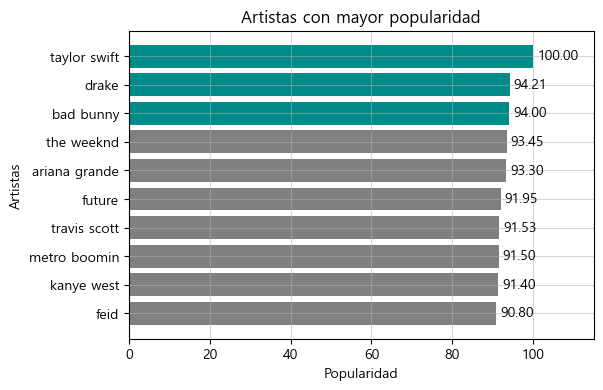

In [6]:
top_artists = artists_df.groupby('names')['popularity'].mean().nlargest(10).reset_index() # Agrupamos y obtenemos los 10 valores más altos

fig, ax = plt.subplots(figsize=(6, 4))

color = ['#008B8B']*top_n + ['gray']*(len(top_artists['names'])-top_n) # Lista de colores para el plot
ax.barh(top_artists['names'], top_artists['popularity'], color=color)

ax.set_title('Artistas con mayor popularidad')
ax.set_xlabel('Popularidad')
ax.set_ylabel('Artistas')
ax.set_xlim(0, 115) # La popularidad tiene un valor maximo de 100
ax.invert_yaxis() # Para observar el max arriba
ax.grid(alpha=0.5)

for i, v in enumerate(top_artists['popularity']): ax.text(v + 1, i, f'{v:.2f}', va='center')

plt.show()

##### 2.1.2. Pistas con mayor popularidad

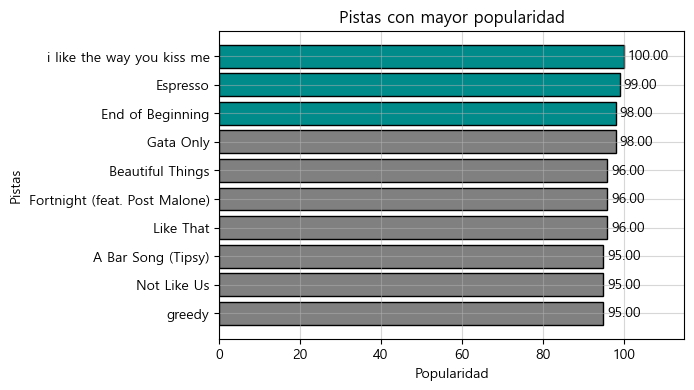

In [7]:
top_tracks = tracks_df.groupby('names')['popularity'].mean().nlargest(10).reset_index()

fig, ax = plt.subplots(figsize=(6, 4))

#color = ['#008B8B']*top_n + ['gray']*(len(top_tracks['names'])-top_n) # Lista de colores para el plot, por si no se ejecutó el de arriba
ax.barh(top_tracks['names'], top_tracks['popularity'], edgecolor='black', color=color)

ax.set_title('Pistas con mayor popularidad')
ax.set_xlabel('Popularidad')
ax.set_ylabel('Pistas')
ax.set_xlim(0, 115) # La popularidad tiene un maximo de aproximadamente 100
ax.invert_yaxis() # Para observar el max arriba
ax.grid(alpha=0.5)

for i, v in enumerate(top_tracks['popularity']):
    ax.text(v + 1, i, f'{v:.2f}', va='center')

plt.show()

#### 2.2. Tendencias En Oyentes Mensuales

##### 2.2.1. Crecimiento de oyentes

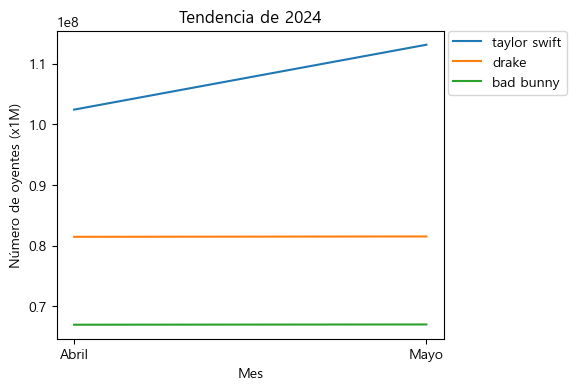

In [8]:
listeners_df = artists_df[['names', 'dates', 'monthly_listeners']] # Escogemos los datos a analizar, para no modificar la tabla
n_artists = top_artists.head(top_n)['names'].unique()
listeners_df = listeners_df[listeners_df['names'].isin(n_artists)].reset_index(drop=True) # Me quedo solo con el top 3
listeners_df[['years', 'months', 'days']] = listeners_df['dates'].str.split('-', expand=True) # Se ha verificado que estan completas las fechas
listeners_df = listeners_df.drop('dates', axis=1) # Elimino dates

# Conversiones de dato
listeners_df['monthlylisteners'] = listeners_df['monthly_listeners']/1000000 # Valores muy grandes a una escala menor
listeners_df['days'] = listeners_df['days'].astype('int64') # De str a entero

month_map = {str(i+1).zfill(2): month for i, month in enumerate(list_month)} # Cambiar de valores numericos en str a Nombre de los mese
listeners_df['months'] = listeners_df['months'].map(month_map)

months_df = listeners_df.drop('years', axis=1) # Suponemos (comprobado al ver los datos) todos son del año 2024
n_month = months_df['months'].unique() # Obtenemos los valores unico por mes

fig, ax = plt.subplots(figsize=(5, 4))
ax.set_ylabel('Número de oyentes (x1M)')
ax.set_title(f'Tendencia de 2024')
ax.set_xlabel('Mes')

df = months_df.groupby(['names', 'months'])['monthly_listeners'].mean().reset_index()
for j in n_artists: # Por cada mes se recorren los n artistas
    j_df = df[df['names'] == j][['months', 'monthly_listeners']] # Por cada artista separamos lo que nos interesa
    ax.plot(j_df['months'], j_df['monthly_listeners'], label=j)

ax.legend(bbox_to_anchor=(1.01, 1), # Ubicar la legenda fuera de la grafica
            loc='upper left', # Referencia la esquina superior izquierda de la legenda
            borderaxespad=0.) # Espacios fuera del borde
plt.show()

##### 2.2.1. Comparación de seguidores y oyentes mensuales: Ver la relación entre el número de seguidores y los oyentes mensuales.

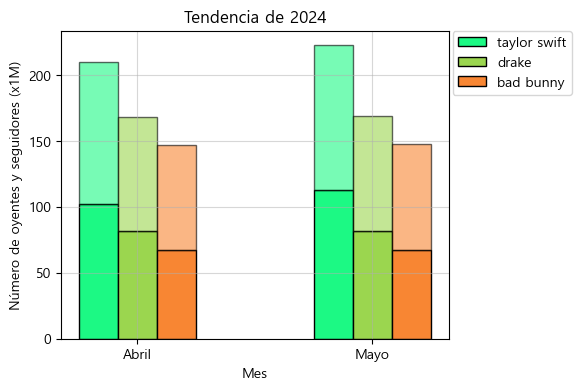

In [9]:
followers_df = artists_df[['names', 'dates', 'followers', 'monthly_listeners']] # Escogemos los datos a analizar, para no modificar la tabla
# n_artists
followers_df = followers_df[followers_df['names'].isin(n_artists)].reset_index(drop=True) # Me quedo solo con el top n
followers_df[['years', 'months', 'days']] = followers_df['dates'].str.split('-', expand=True) # Se ha verificado que estan completas las fechas
followers_df = followers_df.drop('dates', axis=1) # Elimino dates

followers_df['monthly_listeners'] = followers_df['monthly_listeners']/1000000 # Valores muy grandes a una escala menor
followers_df['followers'] = followers_df['followers']/1000000 # Valores muy grandes a una escala menor
followers_df['days'] = followers_df['days'].astype('int64') # De str a entero

followers_df['months'] = followers_df['months'].map(month_map)

months_df = followers_df.drop('years', axis=1) # Suponemos (comprobado al ver los datos) todos son del año 2024
n_month = months_df['months'].unique() # Obtenemos los valores unico por mes

fig, ax = plt.subplots(figsize=(5, 4))

df = months_df.groupby(['names', 'months'])[['monthly_listeners', 'followers']].mean().reset_index()
data = df.pivot_table(index='months', columns='names', values=['monthly_listeners', 'followers']).fillna(0)

months = data.index
width = 0.5 / len(n_artists)

colors = ["#{:06x}".format(random.randint(0, 0xFFFFFF)) for _ in range(len(n_artists))]

for i, artist in enumerate(n_artists):
    x = np.arange(len(months)) + i * width
    bar1 = ax.bar(x, data[('monthly_listeners', artist)], width=width, label=f'{artist}', align='center', color=colors[i], edgecolor='black')
    bar2 = ax.bar(x, data[('followers', artist)], width=width, bottom=data[('monthly_listeners', artist)], align='center', color=colors[i], alpha=0.6, edgecolor='black')

ax.set_ylabel('Número de oyentes y seguidores (x1M)')
ax.set_title('Tendencia de 2024')
ax.set_xlabel('Mes')
ax.set_xticks([r + width for r in range(len(months))])
ax.set_xticklabels(months)
ax.legend(bbox_to_anchor=(1.01, 1), # Ubicar la legenda fuera de la grafica
            loc='upper left', # Referencia la esquina superior izquierda de la legenda
            borderaxespad=0.) # Espacios fuera del borde
ax.grid(alpha=0.5)
plt.show()

# 2.3. Características de Canciones

##### 2.3.1. Distribución de características musicales

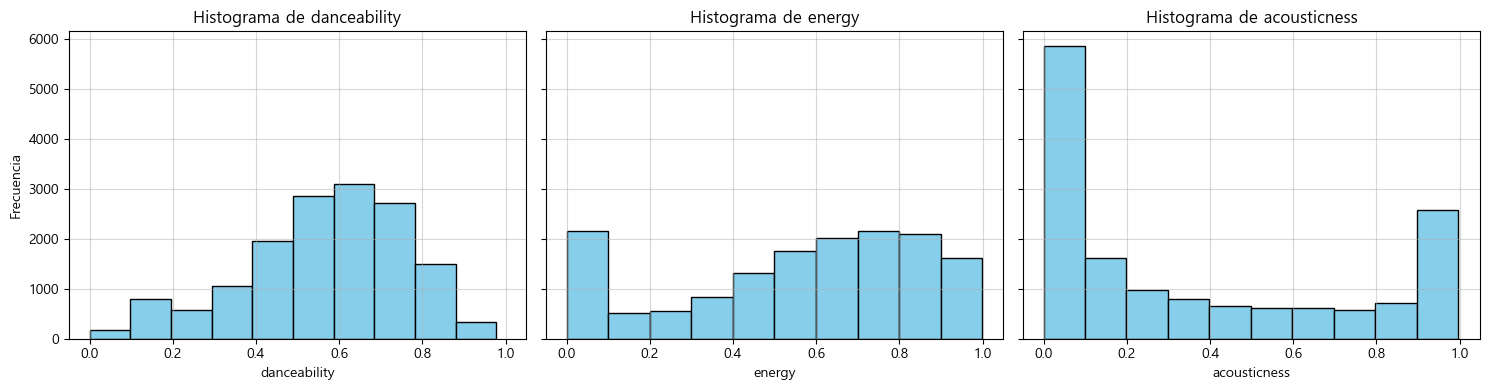

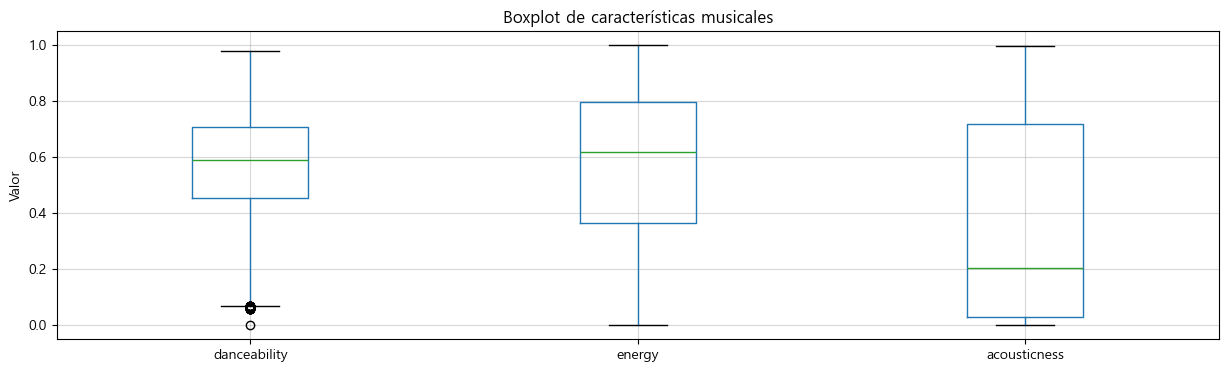

In [10]:
features = ['danceability', 'energy', 'acousticness']

fig, axes = plt.subplots(1, len(features), figsize=(5*len(features), 4), sharex=True, sharey=True)
axes[0].set_ylabel('Frecuencia')

for i, feature in enumerate(features, 1):
    axes[i-1].hist(tracks_df[feature], bins=10, color='skyblue', edgecolor='black')
    axes[i-1].set_title(f'Histograma de {feature}')
    axes[i-1].set_xlabel(feature)
    axes[i-1].grid(alpha=0.5)

plt.tight_layout()
plt.show()

# Crear un boxplot para cada característica
plt.figure(figsize=(5*len(features), 4))
tracks_df[features].boxplot()
plt.title('Boxplot de características musicales')
plt.ylabel('Valor')
plt.grid(alpha=0.5)
plt.show()

##### 2.3.2. Relación entre características

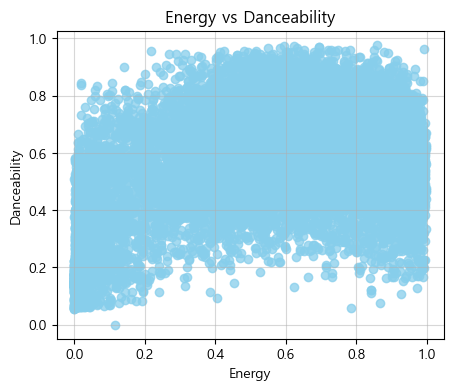

In [11]:
plt.figure(figsize=(5, 4))
plt.scatter(tracks_df['energy'], tracks_df['danceability'], alpha=0.75, color='skyblue')
plt.title('Energy vs Danceability')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.grid(alpha=0.5)
plt.show()

#### 2.4. Análisis Temporal

##### 2.4.1. Tendencias de lanzamientos

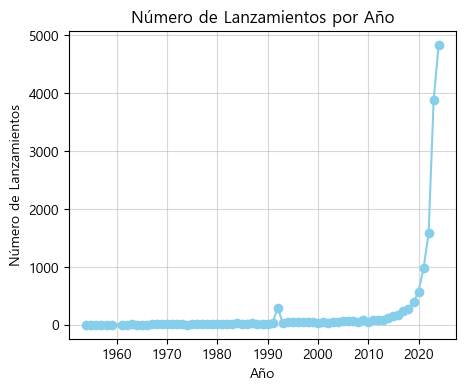

In [12]:
tracks_df['release_date'] = pd.to_datetime(tracks_df['release_date'], errors='coerce')

tracks_df['release_date'] = tracks_df['release_date'].fillna(pd.to_datetime('1992-01-01'))

release_counts = tracks_df['release_date'].dt.year.value_counts().sort_index()

plt.figure(figsize=(5, 4))
plt.plot(release_counts.index, release_counts.values, marker='o', color='skyblue')
plt.title('Número de Lanzamientos por Año')
plt.xlabel('Año')
plt.ylabel('Número de Lanzamientos')
plt.grid(alpha=0.5)
plt.show()

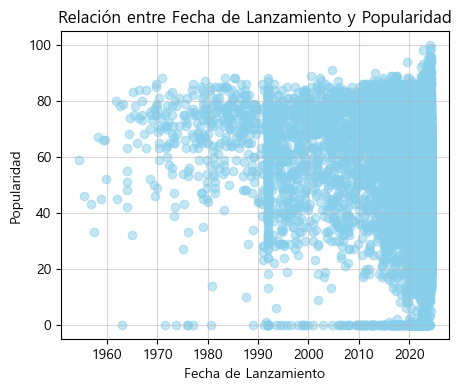

In [13]:
plt.figure(figsize=(5, 4))
plt.scatter(tracks_df['release_date'], tracks_df['popularity'], alpha=0.5, color='skyblue')
plt.title('Relación entre Fecha de Lanzamiento y Popularidad')
plt.xlabel('Fecha de Lanzamiento')
plt.ylabel('Popularidad')
plt.grid(alpha=0.5)
plt.show()

# Fin